![Alt text](image-1.png)
 ![Alt text](image.png)

 Kamila:202214959
 
 Cristian 202113643

## Punto 2

In [ ]:
#PUNTO 2 intento 1

import sympy as sp

# Variables
Q, t, L, R, C, V = sp.symbols('Q, t, L, R, C, V')

# Ecuaciones
eq1 = L*sp.diff(Q, t, t) + R*sp.diff(Q, t) + Q/(C) - V
eq2 = sp.diff(Q, t) - sp.diff(V, t)

# Solve para la derivada de orden superior
derivada_orden_superior = sp.solve(eq2, sp.diff(Q, t))[0]

# Sustituye la ec2 por la ec1 y resuelve la derivada de orden superior
eq3 = eq1.subs(sp.diff(Q, t), derivada_orden_superior)
eq3 = sp.simplify(eq3)
coefficients = sp.Poly(eq3, derivada_orden_superior).coeffs()

# Función que devuelve la primera y la segunda derivada
def derivadas(Q, t, L, R, C, V):
    dQdt = sp.diff(Q, t)
    d2Qdt2 = sp.diff(dQdt, t)
    return dQdt, d2Qdt2

#-------------------------------------------------------
#PUNTO 2 intento 2
import numpy as np
from scipy.integrate import odeint

def derivadas(Q, t, L, R, C, V):
    dQdt = Q[1]  # La primera derivada de Q es la corriente (I)
    dIdt = (V(t) - Q[0]/C - R*Q[1])/L  # Ecuación del circuito en términos de I
    
    return [dQdt, dIdt]

def resolver_circuito_RLC(L, R, C, V, Q0, I0, t):
    # Resuelve el sistema de ecuaciones diferenciales
    sol = odeint(derivadas, [Q0, I0], t, args=(L, R, C, V))
    Q = sol[0]  # Carga Q(t)
    I = sol[:, 1]  # Corriente I(t)
    
    return Q, I, np.gradient(Q, t), np.gradient(np.gradient(Q, t), t)

#---------------------------------------------------------------------
#PUNTO 2 intento 3
import matplotlib.pyplot as plt

# Definir parámetros y condiciones iniciales
L = 1.0  # Inductancia en Henrys
R = 0.5  # Resistencia en Ohms
C = 0.2  # Capacitancia en Farads

# Función de voltaje V(t)
def V(t):
    return np.sin(t)  # Ejemplo: una senoidal

Q0 = 0.0  # Condición inicial de carga
I0 = 0.0  # Condición inicial de corriente

# Definir el arreglo de tiempos
t = np.linspace(0, 10, 1000)

# Resolver el circuito RLC
Q, I, dQ_dt, d2Q_dt2 = resolver_circuito_RLC(L, R, C, V, Q0, I0, t)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, Q, label='Carga (Q)')
plt.plot(t, I, label='Corriente (I)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, dQ_dt, label='Primera derivada de Q')
plt.plot(t, d2Q_dt2, label='Segunda derivada de Q')
plt.legend()
plt.show()

#-----------------------------------------------------------------------
#PUNTO 2 intento 4
#sol prexpl

# Define the variables
Q, t, L, R, C, V = sp.symbols('Q t L R C V')

# Define the equations
eq1 = L*sp.diff(Q, t, t) + R*sp.diff(Q, t) + Q/(C) - V
eq2 = sp.diff(Q, t) - sp.diff(V, t)

# Specify the initial conditions
I0 = 0
V0 = 10

# Define the function that returns the first and second derivative
def derivatives(Q, t, L, R, C, V):
    dQdt = sp.diff(Q, t)
    d2Qdt2 = sp.diff(dQdt, t)
    return dQdt, d2Qdt2

# Define the time step
timesteps = np.linspace(0, 20, 1000)

# Solve the differential equation
sol = sp.dsolve(eq1, Q, ics={Q.subs(t, 0): 0, sp.diff(Q, t).subs(t, 0): I0})

# Evaluate the solution at the specified time step
Q_values = [sol.rhs.subs([(L, 1), (R, 1), (C, 1), (V, V0), (t, timestep)]) for timestep in timesteps]

# Plot the results
plt.plot(timesteps, Q_values)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.show()

In [ ]:
"""
def circuito_RLC(Q, t, L, R, C, V):
    dQdt = Q[1]  # La primera derivada de Q es la corriente (I)
    dIdt = (V(t) - Q[0]/C - R*Q[1])/L  # Ecuación del circuito en términos de I
    
    return [dQdt, dIdt]
def resolver_circuito_RLC(L, R, C, V, Q0, I0, t):
    # Resuelve el sistema de ecuaciones diferenciales
    sol = odeint(circuito_RLC, [Q0, I0], t, args=(L, R, C, V))
    Q = sol[:, 0]  # Carga Q(t)
    I = sol[:, 1]  # Corriente I(t)
    
    # Calcular derivadas
    dQ_dt = np.gradient(Q, t)
    d2Q_dt2 = np.gradient(dQ_dt, t)
    
    return Q, I, dQ_dt, d2Q_dt2
# Definir parámetros y condiciones iniciales
L = 1.0  # Inductancia en Henrys
R = 0.5  # Resistencia en Ohms
C = 0.2  # Capacitancia en Farads

# Función de voltaje V(t)
#Para el primer caso, con I(0)=0 y V(0)=10:

def V1(t):
    return 10.0  # Constante 10 V

Q0a = 0.0  # Condición inicial de carga
I0a = 0.0  # Condición inicial de corriente

# Definir el arreglo de tiempos
t = np.linspace(0, 20, 1000)

# Resolver el circuito RLC
Qa, Ia, dQ_dt_a, d2Q_dt2_a = resolver_circuito_RLC(L, R, C, V1, Q0a, I0a, t)

# Función de voltaje V(t)
#Para el segundo caso, con I(0)=2 V(0)=0:

def V2(t):
    return 0.0  # Constante 0 V

Q0b = 0.0  # Condición inicial de carga (será sobreescrita por la condición de I(0))
I0b = 2.0  # Condición inicial de corriente

# Resolver el circuito RLC
Qb, Ib, dQ_dt_b, d2Q_dt2_b = resolver_circuito_RLC(L, R, C, V2, Q0b, I0b, t)

"""

![Alt text](<Imagen de WhatsApp 2023-10-01 a las 12.43.07_28551e7c.jpg>)

## Punto 2

# "Item 1 & 2"

In [8]:
import numpy as np
from scipy.integrate import odeint

def ecuaciones_circuito_RLC(Q, t, L, R, C, V):
    """
    Resuelve las ecuaciones diferenciales para un circuito RLC.
    
    Args:
        Q (list): Lista con dos elementos [Q, I] representando la carga y la corriente.
        t (numpy.ndarray): Arreglo de tiempos.
        L (float): Inductancia en Henrys.
        R (float): Resistencia en Ohms.
        C (float): Capacitancia en Farads.
        V (function): Función que retorna el voltaje en función del tiempo.

    Returns:
        list: Lista con las derivadas de Q y I en el instante t.

    """
    dQdt = Q[1]  # La primera derivada de Q es la corriente (I)
    dIdt = (V(t) - Q[0]/C - R*Q[1])/L  # Ecuación en términos de I
    
    return [dQdt, dIdt]

def resolver_circuito_RLC(L, R, C, V, Q0, I0, t):
    """
    Resuelve el circuito RLC y calcula la carga, la corriente y sus derivadas.

    Args:
        L (float): Inductancia en Henrys.
        R (float): Resistencia en Ohms.
        C (float): Capacitancia en Farads.
        V (function): Función que retorna el voltaje en función del tiempo.
        Q0 (float): Condición inicial de carga.
        I0 (float): Condición inicial de corriente.
        t (numpy.ndarray): Arreglo de tiempos.

    Returns:
        tuple: (Q, I, dQ_dt, d2Q_dt2), donde:
            Q (numpy.ndarray): Carga en función del tiempo.
            I (numpy.ndarray): Corriente en función del tiempo.
            dQ_dt (numpy.ndarray): Primera derivada de la carga en función del tiempo.
            d2Q_dt2 (numpy.ndarray): Segunda derivada de la carga en función del tiempo.

    """
    sol = odeint(ecuaciones_circuito_RLC, [Q0, I0], t, args=(L, R, C, V))
    Q = sol[:, 0]  # Carga Q(t)
    I = sol[:, 1]  # Corriente I(t)
    
    dQ_dt = np.gradient(Q, t)
    d2Q_dt2 = np.gradient(dQ_dt, t)
    
    return (Q, I, dQ_dt, d2Q_dt2)

    Caso A:

$$ I(0) = 0 $$

$$ V(0) = 10 $$

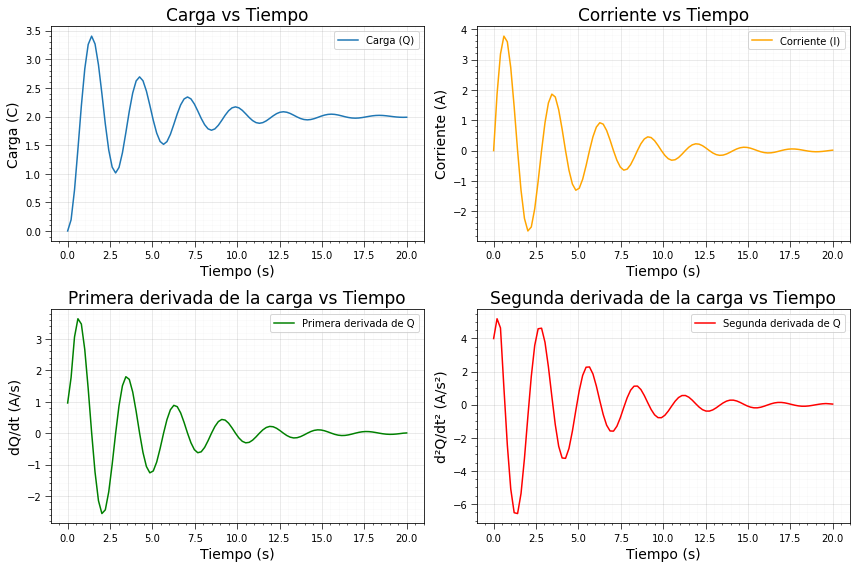

In [9]:
# GRAFICOS A
# Especificación de las variables
L = 1.0  # Inductancia [Henrys]
R = 0.5  # Resistencia [Ohms]
C = 0.2  # Capacitancia [Farads]

# Definición de la función de voltaje V(t)
def V(t):
    return 10.0  # Constante 10 V

# Condiciones iniciales
Q0a = 0.0  # Condición inicial de carga
I0a = 0.0  # Condición inicial de corriente

# Intervalo de tiempo de 0 a 20 segundos
t = np.linspace(0, 20, 100)

# Solución caso A
Qa, Ia, dQ_dt_a, d2Q_dt2_a = resolver_circuito_RLC(L, R, C, V, Q0a, I0a, t)

#print(resolver_circuito_RLC(L, R, C, V, Q0a, I0a, t))

import matplotlib.pyplot as plt

# Graficar los resultados para el caso a
plt.figure(figsize=(12, 8))

# Gráfico de Q(t)
plt.subplot(2, 2, 1)
plt.plot(t, Qa, label='Carga (Q)')
plt.title('Carga vs Tiempo',fontsize=17)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Carga (C)', fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.tick_params(direction='out', length=6, width=0.7, grid_alpha=0.2)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.1)
plt.legend()

# Gráfico de I(t)
plt.subplot(2, 2, 2)
plt.plot(t, Ia, label='Corriente (I)', color='orange')
plt.title('Corriente vs Tiempo',fontsize=17)
plt.xlabel('Tiempo (s)',fontsize=14)
plt.ylabel('Corriente (A)',fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.tick_params(direction='out', length=6, width=0.7, grid_alpha=0.2)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.1)
plt.legend()

# Gráfico de la primera derivada de Q
plt.subplot(2, 2, 3)
plt.plot(t, dQ_dt_a, label='Primera derivada de Q', color='green')
plt.title('Primera derivada de la carga vs Tiempo',fontsize=17)
plt.xlabel('Tiempo (s)',fontsize=14)
plt.ylabel('dQ/dt (A/s)',fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.tick_params(direction='out', length=6, width=0.7, grid_alpha=0.2)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.1)
plt.legend()

# Gráfico de la segunda derivada de Q
plt.subplot(2, 2, 4)
plt.plot(t, d2Q_dt2_a, label='Segunda derivada de Q', color='red')
plt.title('Segunda derivada de la carga vs Tiempo',fontsize=17)
plt.xlabel('Tiempo (s)',fontsize=14)
plt.ylabel('d²Q/dt² (A/s²)',fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.tick_params(direction='out', length=6, width=0.7, grid_alpha=0.2)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.1)
plt.legend()

plt.tight_layout()
plt.show()



    Caso B:

$$ I(0) = 2 $$

$$ V(0) = 0 $$

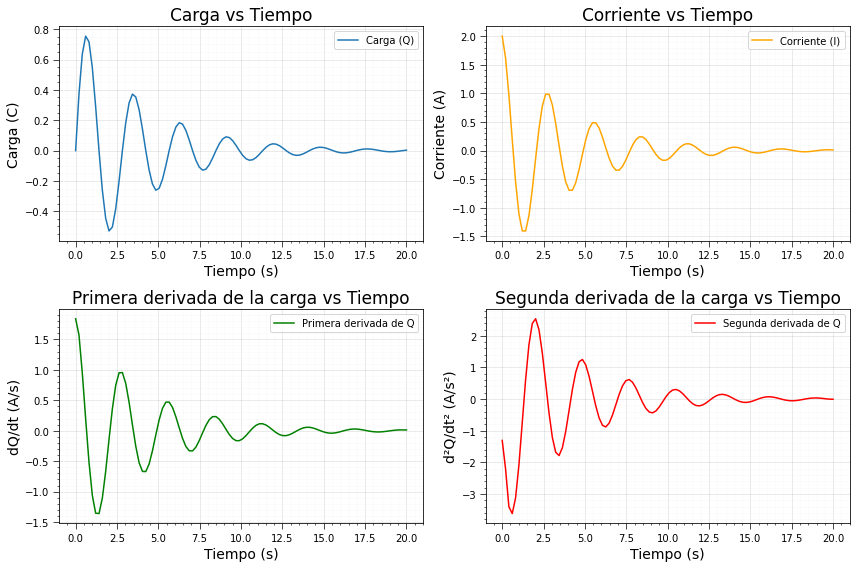

In [10]:
# GRAFICOS B

# Definición de la función de voltaje V(t) 
def V(t):
    return 0.0  # Constante 0 V

# Condiciones iniciales
Q0b = 0.0  # Condición inicial de carga 
I0b = 2.0  # Condición inicial de corriente

# Solución caso B
Qb, Ib, dQ_dt_b, d2Q_dt2_b = resolver_circuito_RLC(L, R, C, V, Q0b, I0b, t)

#print(resolver_circuito_RLC(L, R, C, V, Q0b, I0b, t))

# Graficar los resultados para el caso b
plt.figure(figsize=(12, 8))

# Gráfico de Q(t)
plt.subplot(2, 2, 1)
plt.plot(t, Qb, label='Carga (Q)')
plt.title('Carga vs Tiempo',fontsize=17)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Carga (C)', fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.tick_params(direction='out', length=6, width=0.7, grid_alpha=0.2)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.1)
plt.legend()

# Gráfico de I(t)
plt.subplot(2, 2, 2)
plt.plot(t, Ib, label='Corriente (I)', color='orange')
plt.title('Corriente vs Tiempo',fontsize=17)
plt.xlabel('Tiempo (s)',fontsize=14)
plt.ylabel('Corriente (A)',fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.tick_params(direction='out', length=6, width=0.7, grid_alpha=0.2)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.1)
plt.legend()

# Gráfico de la primera derivada de Q
plt.subplot(2, 2, 3)
plt.plot(t, dQ_dt_b, label='Primera derivada de Q', color='green')
plt.title('Primera derivada de la carga vs Tiempo',fontsize=17)
plt.xlabel('Tiempo (s)',fontsize=14)
plt.ylabel('dQ/dt (A/s)',fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.tick_params(direction='out', length=6, width=0.7, grid_alpha=0.2)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.1)
plt.legend()

# Gráfico de la segunda derivada de Q
plt.subplot(2, 2, 4)
plt.plot(t, d2Q_dt2_b, label='Segunda derivada de Q', color='red')
plt.title('Segunda derivada de la carga vs Tiempo',fontsize=17)
plt.xlabel('Tiempo (s)',fontsize=14)
plt.ylabel('d²Q/dt² (A/s²)',fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.tick_params(direction='out', length=6, width=0.7, grid_alpha=0.2)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.1)
plt.legend()

plt.tight_layout()
plt.show()


# Item 3 
    "(usando odeint)"

Se pueden conocer las soluciones para las variables dependientes en función del tiempo.

En el contexto del circuito RLC, las variables dependientes son la carga Q(t) y la corriente I(t). Por lo tanto, al resolver la ecuación diferencial, se obtiene una serie de valores que representan cómo cambian la carga y la corriente en función del tiempo.

Además de las soluciones directas para Q(t) e I(t), también es posible obtener información sobre sus derivadas respecto al tiempo. Esto puede ser útil para analizar la dinámica del sistema y comprender cómo se comportan las variables en diferentes puntos de tiempo

En resumen, al resolver la ecuación diferencial del circuito RLC, se pueden conocer las siguientes variables en función del tiempo:

 $$ Carga = Q(t) $$

 $$ Corriente = I(t) $$

 $$ (Q') = \frac{dQ}{dt} $$
​
 $$ (Q'') = \frac{d^2 Q}{dt^2} $$



In [6]:
import numpy as np
from scipy.integrate import odeint

def ecuaciones_circuito(Q, t, L, R, C, V):
    dQdt = Q[1]
    dIdt = (- Q[0]/C - R*Q[1])/L
    return [dQdt, dIdt]

def resolver_circuito_RLC(L, R, C, V, Q0, I0, t):
    sol = odeint(ecuaciones_circuito, [Q0, I0], t, args=(L, R, C, V))
    Q = sol[:, 0]
    I = sol[:, 1]
    dQ_dt = np.gradient(Q, t)
    d2Q_dt2 = np.gradient(dQ_dt, t)
    return Q, I, dQ_dt, d2Q_dt2

# Caso A
L = 1.0
R = 0.5
C = 0.2

def V_a(t):
    return 10.0
Q0a = 0.0
I0a = 0.0

t = np.linspace(0, 20, 1000)

Qa, Ia, dQ_dt_a, d2Q_dt2_a = resolver_circuito_RLC(L, R, C, V_a, Q0a, I0a, t)

# Caso B
def V_b(t):
    return 0.0

Q0b = 0.0
I0b = 2.0

Qb, Ib, dQ_dt_b, d2Q_dt2_b = resolver_circuito_RLC(L, R, C, V_b, Q0b, I0b, t)


# Item 4